In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, HBox, VBox
from IPython.display import display

# Updated Sharpe-Schoolfield equation-based thermal performance curve
def sharpe_schoolfield(T, R_ref, E_A, E_L, T_L, E_H, T_H, T_ref):
    k = 8.617e-5  # Boltzmann constant in eV/K
    T_K = T + 273.15  # Convert Celsius to Kelvin
    T_ref_K = T_ref + 273.15
    T_L_K = T_L + 273.15
    T_H_K = T_H + 273.15
    
    return (R_ref * np.exp((E_A / k) * (1 / T_ref_K - 1 / T_K))) / \
           (1 + np.exp((E_L / k) * (1 / T_L_K - 1 / T_K)) + np.exp((E_H / k) * (1 / T_H_K - 1 / T_K)))

# Gaussian-based thermal performance curve
def gaussian_tpc(T, P_max, T_opt, w):
    return P_max * np.exp(-((T - T_opt) / w) ** 2)

# Quadratic thermal performance curve
def quadratic_tpc(T, a, T_opt, P_max):
    return a * (T - T_opt) ** 2 + P_max

# Plotting function
def plot_tpc(R_ref, E_A, E_L, T_L, E_H, T_H, T_ref, P_max, T_opt, w, a):
    T = np.linspace(0, 50, 500)
    
    # Calculate the curves
    sharpe_schoolfield_curve = sharpe_schoolfield(T, R_ref, E_A, E_L, T_L, E_H, T_H, T_ref)
    gaussian_curve = gaussian_tpc(T, P_max, T_opt, w)
    quadratic_curve = quadratic_tpc(T, a, T_opt, P_max)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    
    plt.plot(T, sharpe_schoolfield_curve, label="Sharpe-Schoolfield")
    plt.plot(T, gaussian_curve, label="Gaussian")
    plt.plot(T, quadratic_curve, label="Quadratic", linestyle='--')
    
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Performance')
    plt.title('Thermal Performance Curves')
    plt.legend()
    plt.ylim(0, 1.5 * max(R_ref, P_max))
    plt.grid(True)
    plt.show()

# Create sliders
R_ref_slider = FloatSlider(min=0.1, max=1., step=0.1, value=0.3, description='R_ref')
E_A_slider = FloatSlider(min=0.1, max=2.0, step=0.1, value=0.65, description='E_A')
E_L_slider = FloatSlider(min=-10, max=10, step=0.1, value=-5, description='E_L')
T_L_slider = FloatSlider(min=0.0, max=20.0, step=0.5, value=15, description='T_L (°C)')
E_H_slider = FloatSlider(min=0.1, max=10.0, step=0.1, value=5, description='E_H')
T_H_slider = FloatSlider(min=20.0, max=60.0, step=0.5, value=32.0, description='T_H (°C)')
T_ref_slider = FloatSlider(min=0.0, max=50.0, step=0.5, value=28.0, description='T_ref (°C)')
P_max_slider = FloatSlider(min=0.1, max=10.0, step=0.1, value=0.3, description='P_max (Gaussian)')
T_opt_slider = FloatSlider(min=10.0, max=40.0, step=1.0, value=28, description='T_opt (Gaussian)')
w_slider = FloatSlider(min=1.0, max=20.0, step=1.0, value=5.0, description='w (Gaussian)')
a_slider = FloatSlider(min=-0.05, max=-0.001, step=0.001, value=-0.01, description='a (Quadratic)')

# Organize sliders in a vertical box
sliders = VBox([R_ref_slider, E_A_slider, E_L_slider, T_L_slider, E_H_slider, T_H_slider, T_ref_slider,
                P_max_slider, T_opt_slider, w_slider, a_slider])

# Create an interactive plot linked to the sliders
def interactive_plot():
    interact(plot_tpc, 
             R_ref=R_ref_slider, E_A=E_A_slider, E_L=E_L_slider, 
             T_L=T_L_slider, E_H=E_H_slider, T_H=T_H_slider, T_ref=T_ref_slider,
             P_max=P_max_slider, T_opt=T_opt_slider, w=w_slider, a=a_slider)

# Display plot and sliders side by side
ui = HBox([sliders])
display(ui)
interactive_plot()


interactive(children=(FloatSlider(value=0.3, description='R_ref', max=1.0, min=0.1), FloatSlider(value=0.65, d…

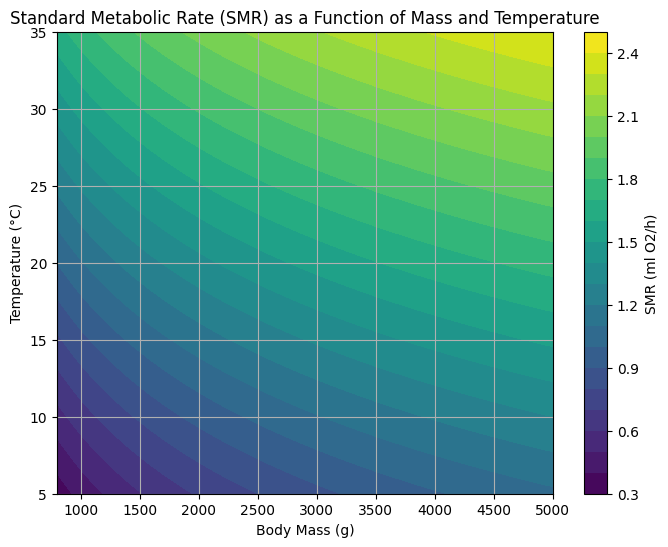

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Eastern diamond backs
# Function for the SMR relationship based on the paper's equation
def smr(mass, temp):
    return 0.930 * np.log10(mass) + (0.044 * temp) - 2.58

# Generate values for body mass and temperature
mass_values = np.linspace(800, 5000, 100)  # Mass range of 800g to 5000g
temperature_values = np.linspace(5, 35, 100)  # Temperature range from 5°C to 35°C

# Create a grid of mass and temperature values for plotting
mass_grid, temp_grid = np.meshgrid(mass_values, temperature_values)

# Calculate SMR for each combination of mass and temperature
smr_values = smr(mass_grid, temp_grid)

# Plotting the SMR as a function of mass and temperature
plt.figure(figsize=(8, 6))
contour = plt.contourf(mass_grid, temp_grid, smr_values, cmap='viridis', levels=20)
plt.colorbar(contour, label='SMR (ml O2/h)')
plt.title('Standard Metabolic Rate (SMR) as a Function of Mass and Temperature')
plt.xlabel('Body Mass (g)')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


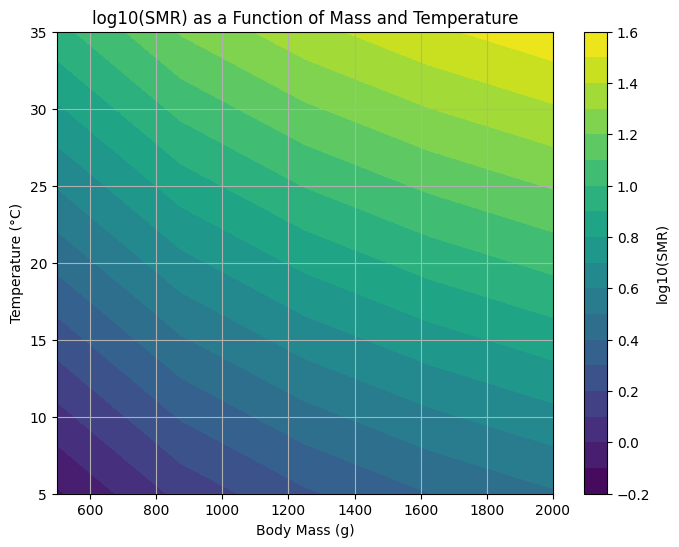

In [2]:
# SMR equation constants
X1 = -3.036
X2 = 0.036
X3 = 0.043

# SMR function
def smr_eq(mass, temperature):
    '''This returns log(smr)'''
    return np.log10(mass) + X2 * temperature + X1 + X3

# Generate a range of temperatures and masses
temperatures = np.linspace(5, 35, 100)  # Temperature range from 5°C to 35°C
mass_values = np.linspace(500, 2000, 5)  # Example mass values from 500g to 2000g
mass_grid, temp_grid = np.meshgrid(mass_values, temperatures)

# Calculate SMR values for each combination of mass and temperature
smr_values_grid = smr_eq(mass_grid, temp_grid)

# Plot the heatmap
plt.figure(figsize=(8, 6))
heatmap = plt.contourf(mass_grid, temp_grid, smr_values_grid, cmap='viridis', levels=20)
plt.colorbar(heatmap, label='log10(SMR)')
plt.title('log10(SMR) as a Function of Mass and Temperature')
plt.xlabel('Body Mass (g)')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()